In [11]:
# Importing all the necessary libraries
from tensorflow.keras.datasets import mnist
import torchvision
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import numpy as np
import torch
from torch import nn
from collections import defaultdict
from functools import partial

import matplotlib.pyplot as plt
import copy

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0


X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [13]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 28, 28)
(60000,)
(10000,)


In [14]:
# What is being done here:
# We are collecting all the images by classes
# Each entry in the 'output' list is 
# a numpy array of all the images by class
output = []
for i in range(10):
    classno = X_train[np.where(y_train==i)]
    output.append(classno)

In [15]:
# What is happening here:
# We are stacking the classes into one output 'total_list'
# In addition, we are also appending the cluster center into each class
# This is needed for the next step: T-Stochastic Nearest Neighbors plotting

total_list = []
indices = []
for number in range(10):
    kmeans = MiniBatchKMeans(n_clusters = 1, batch_size = output[number].shape[0])
    kmeans.fit(output[number])
    output[number] = np.concatenate((output[number], kmeans.cluster_centers_), axis=0)
    total_list.append(output[number][:])
    if not indices:
        indices.append(output[number].shape[0])
    else:         
        indices.append(indices[-1] + output[number].shape[0])
        
total_list = np.concatenate(total_list, axis=0)

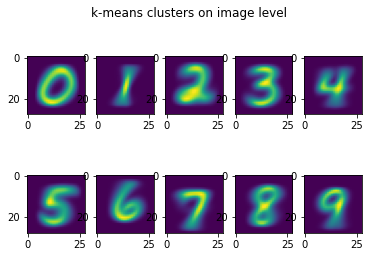

In [16]:
# Printing all the k-means cluster (0-9)
fig, axs = plt.subplots(2,5)
fig.suptitle('k-means clusters on image level')
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(total_list[indices[5*i + j]-1].reshape(28,28))

In [17]:
# We do the TSNE transform on total_list
from sklearn.manifold import TSNE
tsne_points = TSNE(n_components=2, perplexity = 50, n_iter = 10000).fit_transform(total_list)

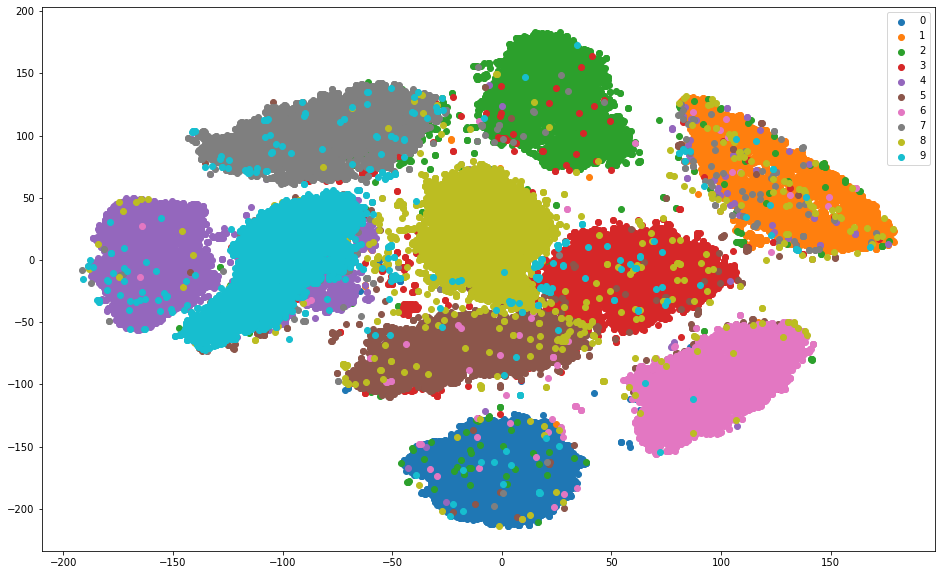

In [20]:
# Doing a naive plotting here.
# What needs to be done:
# 1. Change the color for each cluster
# 2. Differentiate the color of the cluster from its centroid
# 3. Have a legend print out all the cluster with its label
start = 0
plt.figure(figsize=(16,10))
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuBuGn']

for i,end in enumerate(indices):
    plt.scatter(tsne_points[start:end,0], tsne_points[start:end,1], cmap=cmaps[i], label=i)
    plt.legend()
    start = end
    
plt.savefig('mnist-clustermaps.png')